The purchase analytics is related to positioning with the purpose is to find out the answer for the below questions:

1. Will the customer by the particular product category when they come to store
2. Which Brand is the customer going to choose
3. How many units the customer going to buy of particular product


## Libraries

In [1]:
#impor numpy and pandas
import numpy as np
import pandas as pd

#import the sk learn modules,scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#  pickle in order to be able to load our pickled objects.
import pickle

#import the necessary libraries for visualization,seaborn do be the default.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# to stop receiving warnings
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
# Load data, read the purchase data csv file.
df_purchase = pd.read_csv('data/purchase data.csv')

## Data Exploration

In [3]:
# head method on data
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


On this dataset we have the transactions of each customer, \
This dataset has information of each purches of the customer in two years, \
because the data is really big, I will focuse only one lamp product.

### Now lets find out about the data
#### I'll explain each Columns 

##### Day:
records for a each day for each customer.

##### Incidence:
0 - if The customer has not purchased an item from the category of interest. \
1 - if The customer has purchased an item from the category of interest.

##### Brand:
Which brand the customer has purchased.

##### Quantity:
Number of items bought by the customer from the product category of interest.

##### Last_Inc_Brand:
Shows which brand the customer has purchased on their previous store visit.

##### Last_Inc_Quantity:
Number of items bought by the customer from the product category of interest during their previous store visit.

##### Price_1 to Price_5:
Price of an item from Brands on a particular day.

##### Promotion_1 to Promotion_5:
Indicator whether Brands was on promotion or not on a particular day.

##### Sex:
Biological sex (gender) of a customer. In this dataset there are only 2 different options.

##### Age:
The age of the customer in years.

##### Education:
Level of education of the customer.

##### Income:
Self-reported annual income in US dollars of the customer.

##### Occupation:
Category of occupation of the customer. \
0 - unemployed / unskilled \
1 - skilled employee / official \
2 - management / self-employed / highly qualified employee / officer

##### Settelement:
The size of the city that the customer lives in. \
0 - small city \
1 - mid-sized city \
2 - big city


In [4]:
# check for missing values.
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

It seems there is no nulls and our data is clean

In [5]:
# check for duplicated values.
df_purchase.duplicated().sum()

0

It seems there is no duplicated and our data is clean

### I need the DATA Segmentaion pickel files because i have do the same way to make this data usable

### Import Segmentation Model pickles

In [6]:
# loading pickled objects in order to segment the purchase data set.
# loding the scaler
scaler = pickle.load(open('scaler.pickle', 'rb')) #rb mean Read bytes

In [7]:
# loading the PCA
pca = pickle.load(open('pca.pickle', 'rb')) #rb mean Read bytes

In [8]:
# loading the k-mean by PCA
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb')) #rb mean Read bytes

### Standardization
I'm going to transform my new data only and the reason is the pickel file contains the information i need and the data should be only transform 

In [9]:
# standardize the purchase data in the same way i did the segmentation data, using the standard scaler.
# i'm transforming the data only on respective columns names
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [10]:
# I apply pca on the purchase data and obtain 3 principal components for each row in the table. 
# I suppose the data should have some duplicates because each customer have more than 1 purches.
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [11]:
# Based on the principal components, we use the predict method from pca to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [12]:
# Copy resulting data frame as a purchase predictors data frame. 
# I will changing the predictors data frame, by adding and changing columns.
# Therefore, we want to keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [13]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

I'm going to find out each individuals belongs to which segment and what products buying behaviuors

### Data Analysis by Customer

In [14]:
# the head of dataset
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [15]:
# Purchase occasions by customer ID
Number_Occasion_Individual = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count() #grouping the customers
Number_Occasion_Individual = Number_Occasion_Individual.set_index('ID') #setting the id as a index
Number_Occasion_Individual = Number_Occasion_Individual.rename(columns = {'Incidence': 'Number_Visits'}) #renaming the column to be understandable
Number_Occasion_Individual.head()

,Number_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
# Number of purchases per customer ID
Number_Purcheses_Individual = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()#grouping the customers
Number_Purcheses_Individual = Number_Purcheses_Individual.set_index('ID') #setting the id as a index
Number_Purcheses_Individual = Number_Purcheses_Individual.rename(columns = {'Incidence': 'Number_Purchases'})#renaming the column to be understandable
Average_Number_Purchese = Number_Occasion_Individual.join(Number_Purcheses_Individual) # combining the tables
Average_Number_Purchese.head()

,Number_Visits,Number_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [17]:
# Average number of purchases frequency by customer ID
Average_Number_Purchese['Average_Number_Purchases'] = Average_Number_Purchese['Number_Purchases'] / Average_Number_Purchese['Number_Visits']
Average_Number_Purchese.head()

,Number_Visits,Number_Purchases,Average_Number_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [18]:
# obtain the segment for each customer in the data set.
Customer_segment_belongs = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean() #grouping the customers
Customer_segment_belongs = Customer_segment_belongs.set_index('ID') #setting the id as a index
df_purchase_descr = Average_Number_Purchese.join(Customer_segment_belongs) # combining the tables
df_purchase_descr.head()

,Number_Visits,Number_Purchases,Average_Number_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


Now we have shopping behavioral of each customer, now i'm going to analye the each segment behavior

In [19]:
len(df_purchase_descr)

500

### ${\textbf{Segment Proportions}}$

In [20]:
# calculate the proportions of each segment and set the appropriate column name. 
segm_prop = df_purchase_descr[['Number_Purchases', 'Segment']].groupby(['Segment']).count() / len(df_purchase_descr)
segm_prop = segm_prop.rename(columns = {'Number_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


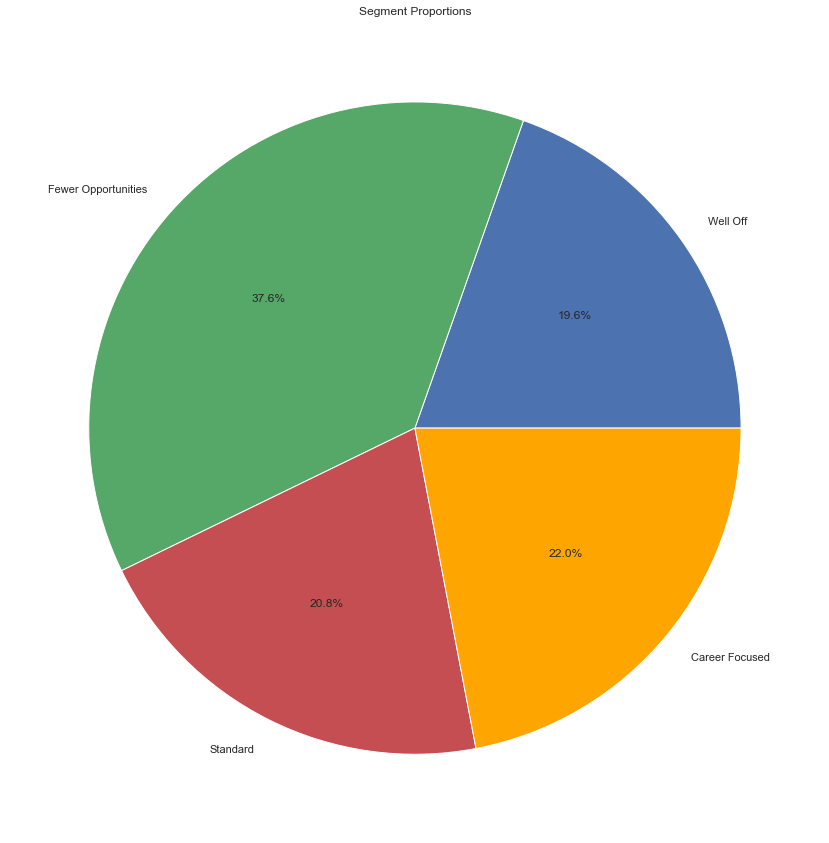

In [21]:
# lets plot the segment proportions as a pie chart. 
plt.figure(figsize = (25, 15))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Well Off', 'Fewer Opportunities','Standard','Career Focused'], # pie chart labels
        autopct = '%1.1f%%', # auto percentage 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')
plt.show()

# lets analyze the pie chart
##### The most purchases been done by "Fewer opportunities" with 37% Followed by "Carrier Focused" one with 22%, \
##### and "Weel Off" and "Standard" are allmost equally disturbutrd each by around 20%

#### Now i'm going to find the quantitative measure to describe the purchase behaivours by segments,\
#### that means i'm trying to find out :
#### 1. How often people from different segments visit the store
#### 2. How often they bought our specific product
#### 3. How often they bought the specific product related to each visit


I have to calculate the mean and Standard diviation by segment in dataframe, the mean shows the average behavior of each segment while standard diviation shows how homogeneous each segemnt is.

### ${\textbf{Purchase Occasion and Purchase Incidence}}$

In [22]:
# calculate the mean by the four segments. It will help me determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean() # calculating the mean of each segment
segments_mean

,Number_Visits,Number_Purchases,Average_Number_Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [23]:
#calculate the standard deviation by segments. It will help me determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std() # calculating the standard diviation of each segment

##### Now i can plot the information and make an Insight 

##### 1. Plot the average number of store visits for each of the four segments using a bar chart.
##### 2. The standard deviation as a straight line. The bigger the length, the higher the standard deviation is.

# 1.How often the people from each segment visit the store

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

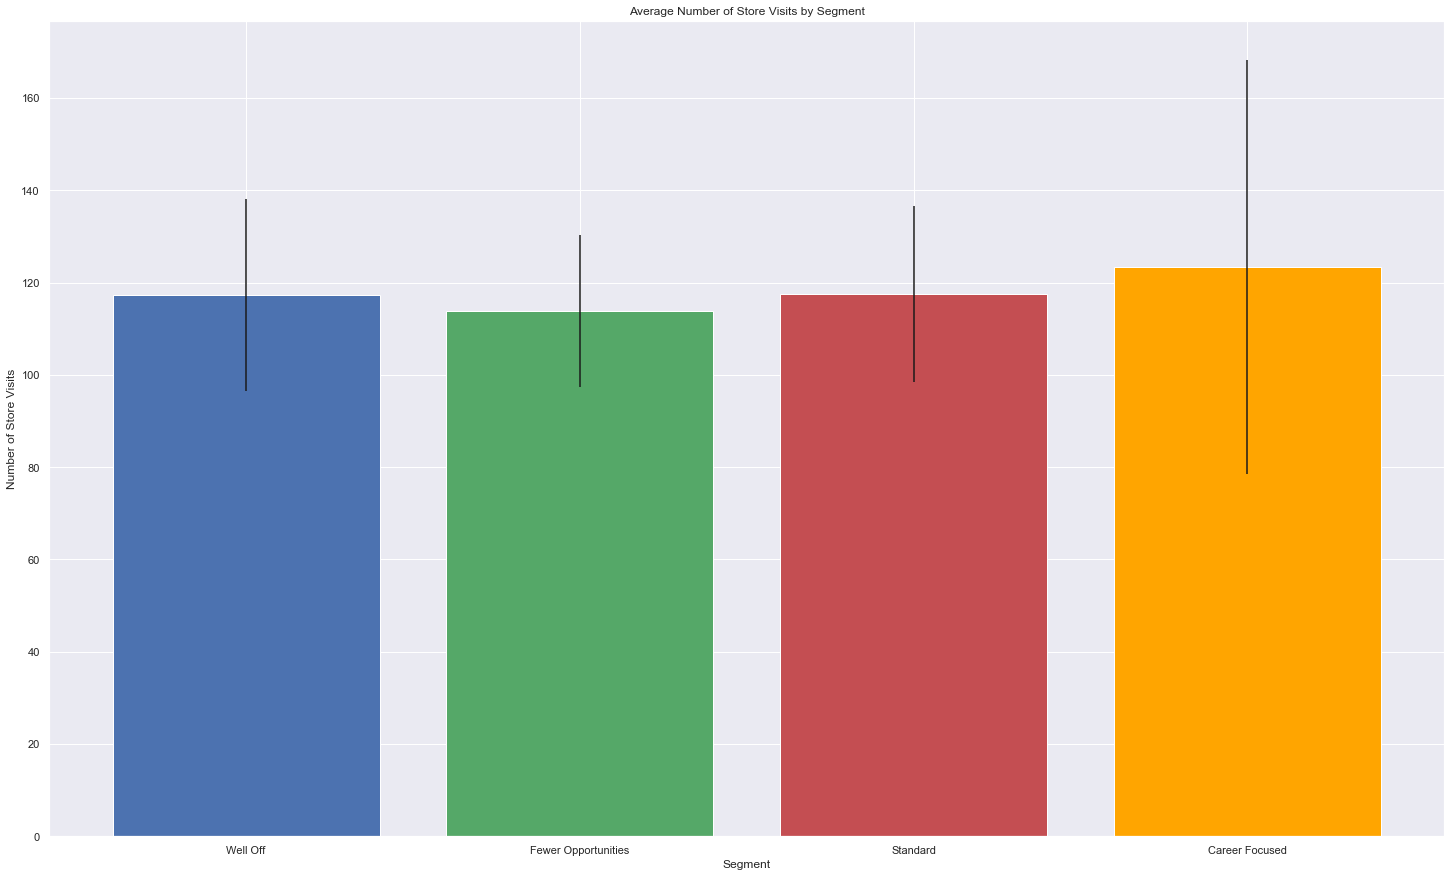

In [24]:
#ploting
plt.figure(figsize = (25, 15)) #plot size
plt.bar(x = (0, 1, 2, 3), # the segments
        tick_label = ('Well Off', 'Fewer Opportunities','Standard','Career Focused'), #indication of each segment name
        height = segments_mean['Number_Visits'],
        yerr = segments_std['Number_Visits'],
        color = ('b', 'g', 'r', 'orange')) # same color as the pie chart
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

# Lets Analyze

##### The hight of each chart means each segment store visits, the black line in the other hand shows the dispersion of data points.
So we can see that the Carrier Focused visited most and the Fewer opportunities segment has the minimum visits, in my view except Carrier focused segemnt other segments are some how in a same or similar in store purchases.

# 2.How often the customer buy the product

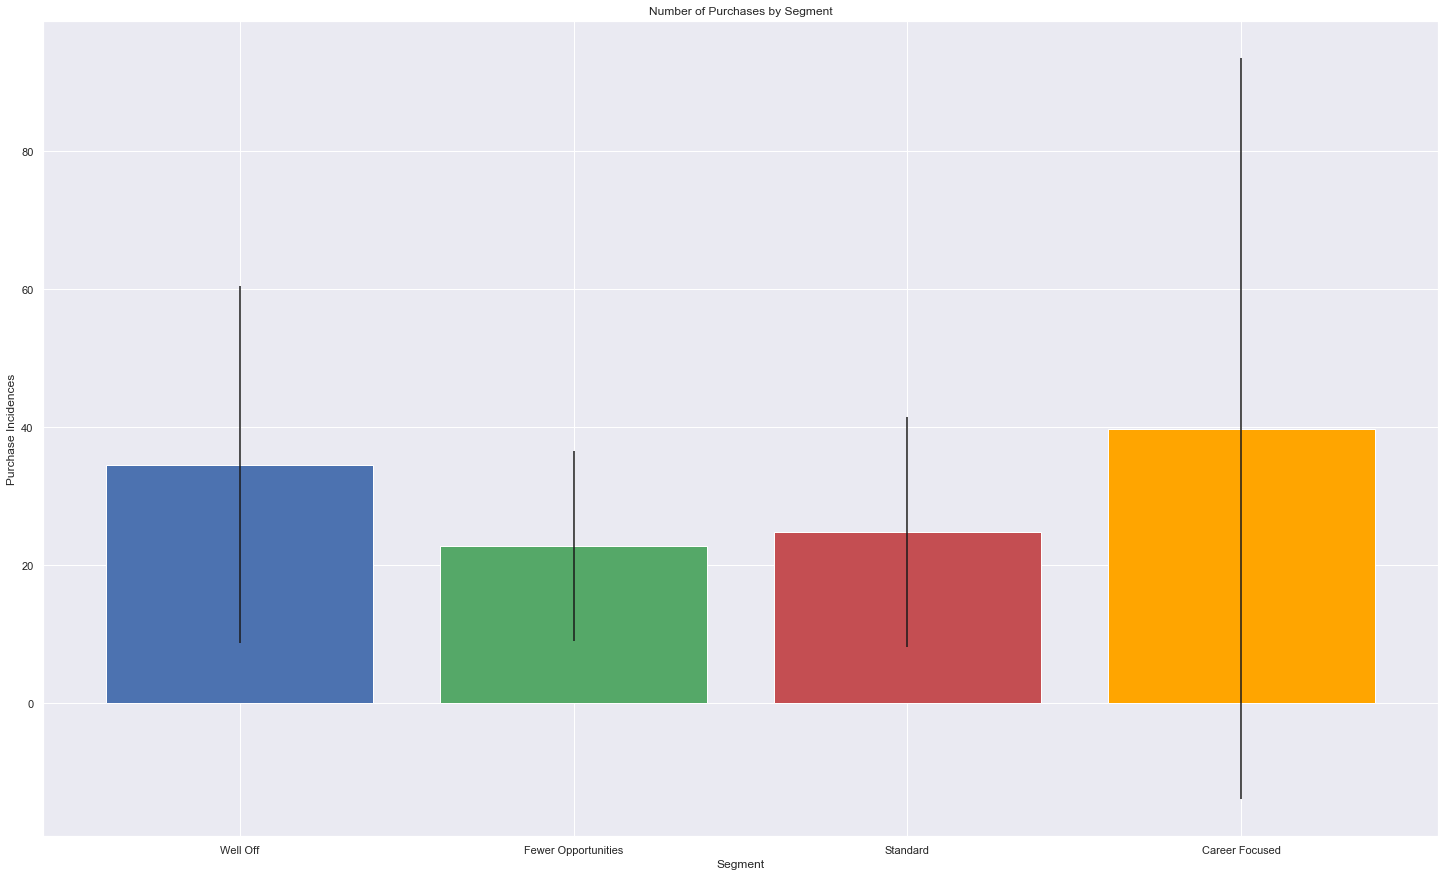

In [25]:
# display the average number of purchases by segments. 
# They will help us understand how often each group buys chocholate candy bars.
plt.figure(figsize = (25, 15))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well Off', 'Fewer Opportunities','Standard','Career Focused'), 
        height = segments_mean['Number_Purchases'],
        yerr = segments_std['Number_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')
plt.show()

# The insight of the plot

#### we can observe the Carrier Focused segment buys product more often, how ever the standard diviation is highest, it might be a part of segment buy the product frequently and other parts less so.

# Lets see the average number of purchases by segment

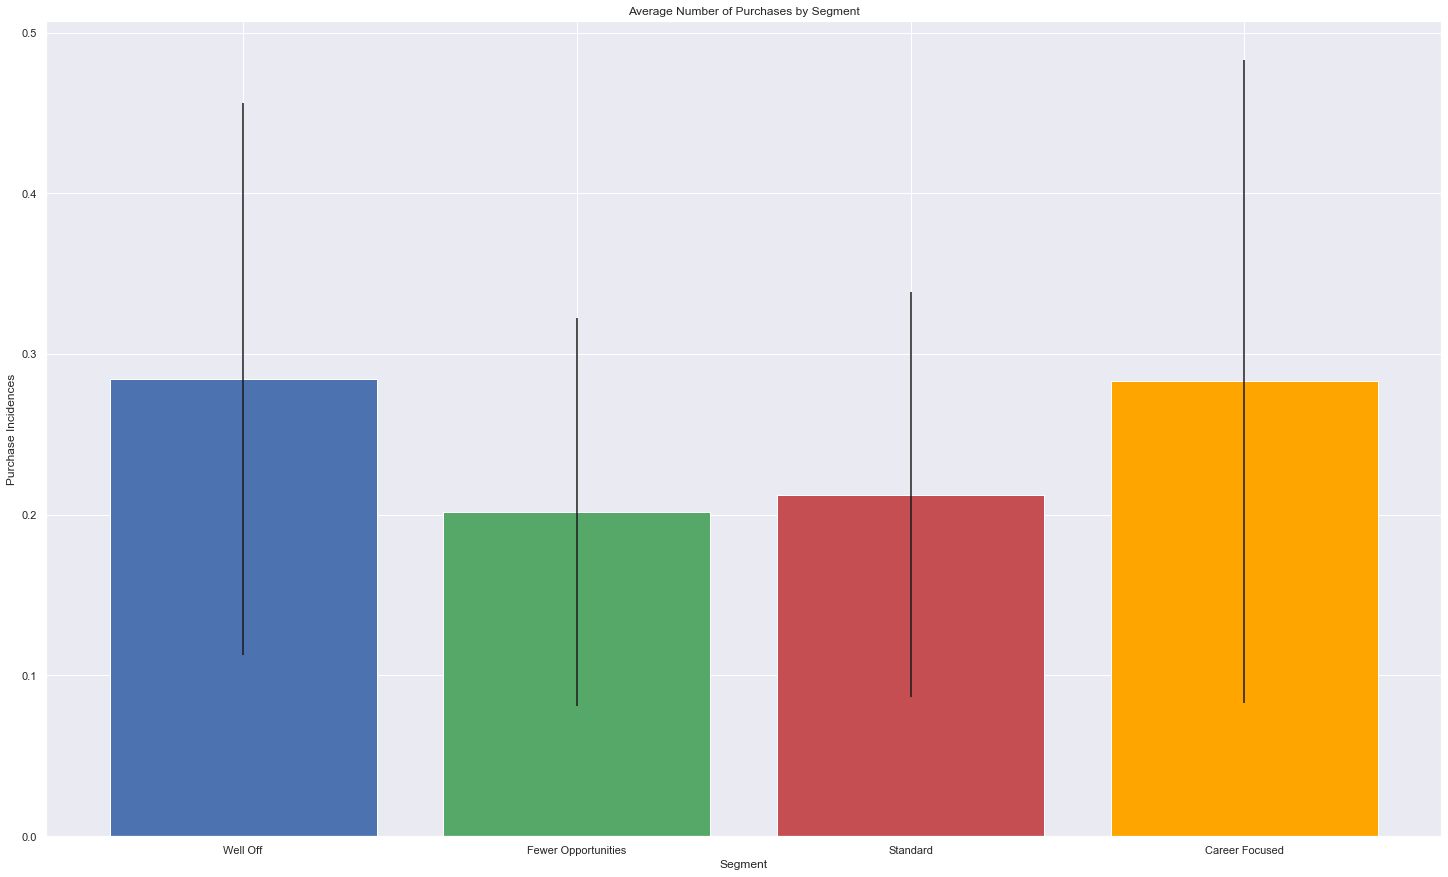

In [26]:
# display the average number of purchases.
plt.figure(figsize = (25, 15))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Well Off', 'Fewer Opportunities','Standard','Career Focused'),
        height = segments_mean['Average_Number_Purchases'], 
        yerr = segments_std['Average_Number_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')
plt.show()

# Which brand the customer going to choose

my observation will be focused on the customers who bought atleast one lamp for each visit.

### Brand Choice

In [52]:
# only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1] # Select only rows where incidence is one

In [53]:
# lets make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')

I could use only segments but it will make a problem, because if a customer bought a lapms in a 30 different occasions it will be calculated as 30 times, and it makes a bias in result, so i'm grouping them by Segment and after that by ID

In [54]:
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


Lets calculate the Brand mean

In [56]:
Brans_Mean = brand_dummies.groupby(['ID'], as_index = True).mean()

Now the group by segment will give the result we need to indicate brand choice.

In [58]:
mean_brand_choice = Brans_Mean.groupby(['Segment'], as_index = True).mean()

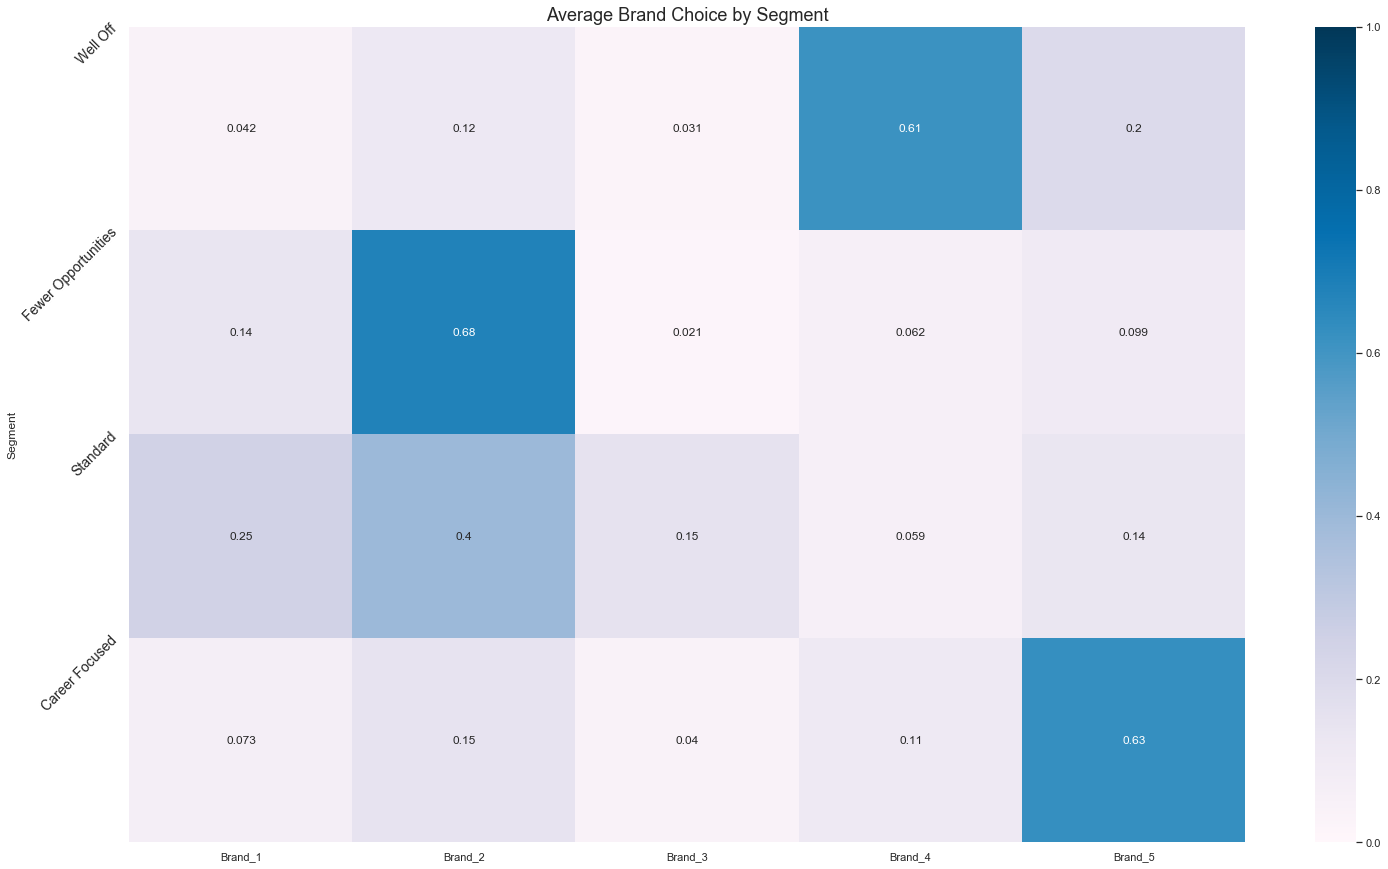

In [68]:
plt.figure(figsize=(25,15))
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Well Off', 'Fewer Opportunities','Standard','Career Focused'], rotation = 45, fontsize = 14)
plt.title('Average Brand Choice by Segment', fontsize=18)
plt.show()

# Lets analyze the heatmap

#### Each of the numbers here shows the average proportion of brand choices for each segment, all brand are orders by the low to high price (Brand_1 is cheapest and Brand_5 is the most expensive one) 

#### We can see the "Fewer opportunities" segment tends to buy the second brand, it is not the lowest price so we can say the price is not the most important think to choose the product,

#### Carrier Focused segment has strongly attitude to by the Brand_5 ( the most expensive ), it seems this young and hard workers segment loves the fancy brands ( they like to have the luxury thinks so we can raise the that brand even further).

#### The high income segment like the luxury brand too but not the most expensive one.

#### but the "Standard" segment is likly to buy all brands occasionally but they do not interested in brand 4 ( one of the good marketing way for them might be encourage them to test the other brans)

Now to complete the analysis i'm going to calculate the revenue of each brand regarding each segment

### Revenue

In [69]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# multiply the price of the brand for that particular day by the quantity of the product purchased.
Revenue_Brand_one = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
Revenue_Brand_one.loc[:, 'Revenue Brand 1'] = Revenue_Brand_one['Price_1'] * Revenue_Brand_one['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = Revenue_Brand_one[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [71]:
# Compute revenue for brand 2. We use the same formula, but here we filter our data to contain only purchases of brand 2.
Revenue_Brand_two = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
Revenue_Brand_two.loc[:, 'Revenue Brand 2'] = Revenue_Brand_two['Price_2'] * Revenue_Brand_two['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = Revenue_Brand_two[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,699.47,1298.23
1,1,2258.90,13868.30
2,2,2611.19,4855.36
3,3,736.09,1746.42


In [72]:
# Compute revenue for brand 3
Revenue_Brand_three = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
Revenue_Brand_three.loc[:,'Revenue Brand 3'] = Revenue_Brand_three['Price_3']*Revenue_Brand_three['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = Revenue_Brand_three[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,699.47,1298.23,731.35
1,1,2258.90,13868.30,716.25
2,2,2611.19,4855.36,3909.17
3,3,736.09,1746.42,664.75


In [73]:
# Compute revenue for brand 4
Revenue_Brand_four = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
Revenue_Brand_four.loc[:,'Revenue Brand 4'] = Revenue_Brand_four['Price_4']*Revenue_Brand_four['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = Revenue_Brand_four[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,699.47,1298.23,731.35,14185.57
1,1,2258.90,13868.30,716.25,1629.31
2,2,2611.19,4855.36,3909.17,861.38
3,3,736.09,1746.42,664.75,2363.84


In [74]:
# Compute revenue for brand 5
Revenue_Brand_five = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
Revenue_Brand_five.loc[:,'Revenue Brand 5'] = Revenue_Brand_five['Price_5']*Revenue_Brand_five['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = Revenue_Brand_five[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,699.47,1298.23,731.35,14185.57,5509.69
1,1,2258.90,13868.30,716.25,1629.31,2230.50
2,2,2611.19,4855.36,3909.17,861.38,2439.75
3,3,736.09,1746.42,664.75,2363.84,19441.06


In [75]:
# compute the total revenue for each of the segments. 
# simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [76]:
# further modify the table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Well Off',
                                                                           1:'Fewer Opportunities',
                                                                           2:'Standard',
                                                                           3:'Career Focused'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue


,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Well Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Fewer Opportunities,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
Career Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220


# Lets see what we achived

### Total revenue:
##### - The "Carrier focused" segment brings the most revenue followed by "Fewer opportunities" and "Well Off", and the minimum revenue will be received from "Standard" segment.

### Segment Proportion:
##### - We can see the "Carrier focused" segment has the 2nd place in our data and they will bring us most revenue, so this group must be treated the best.
##### - The "Standard" segment allmost has the same value but it the revenue they bring is almost half.
##### - The "Well Off" and "Fewer opportunities" segments alomost have the same amount of revenue but the proportion of the "Fewer Opportunities" is twise the other one (it means we should find the other ways to make more revenue from "Fewer opportunities" segment.


### Brands Perspective: (lets work as a marketers and find some insights from the table)
##### - it seems the brand number 3 has the less revenue that other four, it is the middle brand in terms of price and we know the "Standard" segment more likly to buy the 3rd brand, so maybe if they reduce the price the brand will sell more.

##### - The brand 4 has the "well Off" customers although there is a more expensive brand, this shows me that they are loyal to this brand and won't be affected by price, maybe the brand can raise the price a Little to bring more revenue.


This is the assumption yet.